In [47]:
from pydtmc import *
import numpy as np
import matplotlib.pyplot as plt
import asyncio

In [48]:
p = 0.7
k = 30
s = 100
mc = MarkovChain.gamblers_ruin(s + 1, p, [str(i) for i in range(s + 1)])

Text(0, 0.5, 'Capital del jugador')

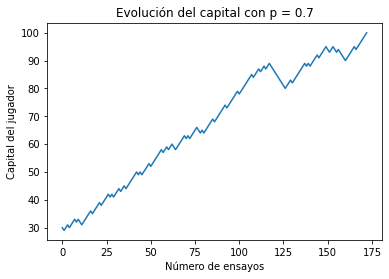

In [49]:
w = [str(k)]
i = 0
x = str(k)
while x != str(s) and x != "0":
  x = mc.next_state(w[i])
  w.append(x)
  i += 1
plt.plot([int(i) for i in w])
plt.title(f"Evolución del capital con p = {p}")
plt.xlabel("Número de ensayos")
plt.ylabel("Capital del jugador")

In [50]:
async def simular():
  w = str(k)
  while w != str(s) and w != "0":
    w = mc.next_state(w)
  return 1 if w == "0" else 0

np.mean(await asyncio.gather(*[simular() for _ in range(1000)]))

0.0